In [204]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("https://raw.githubusercontent.com/hongnhungyknb1925/data_driven/main/bank-additional-full.csv", sep =";")
df.shape

(41188, 21)

In [173]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [174]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Drop và số hóa các feature

In [175]:
df = df.drop(["month","day_of_week","contact"],axis=1)
df["education"]=df["education"].replace(['basic.4y','high.school','basic.6y','basic.9y','professional.course','university.degree','illiterate',"unknown"],[0,1,2,3,4,5,6,np.nan])


In [176]:
df.housing[df['housing']=='no']=0
df.housing[df['housing']=='yes']=1
df.housing[df['housing']=='unknown']=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
df.loan[df['loan']=='no']=0
df.loan[df['loan']=='yes']=1
df.loan[df['loan']=='unknown']=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
df["loan"]=df["loan"]+df["housing"]
df = df.drop("housing",axis=1)

In [179]:
df.head()

,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,0.0,no,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,1.0,unknown,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,1.0,no,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2.0,no,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,1.0,no,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



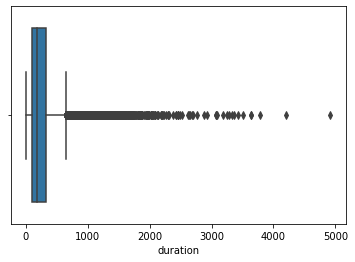

In [180]:
import seaborn as sns
sns.boxplot(df['duration'])

In [181]:
Q1 = np.percentile(df['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(df['duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['duration'] <= (Q1-1.5*IQR))
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



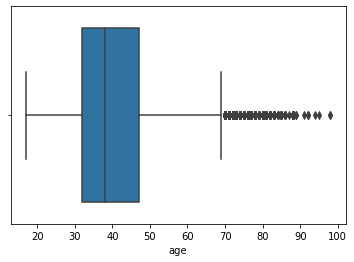

In [182]:
import seaborn as sns
sns.boxplot(df['age'])

In [183]:
Q1 = df['previous'].quantile(.20)
Q3 = df['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['previous'] >= lower] 
df = df[df['previous'] <=upper]

In [184]:
Q1 = df['age'].quantile(.20)
Q3 = df['age'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['age'] >= lower] 
df = df[df['age'] <=upper]

In [185]:
df["y"]=df["y"].replace("no",0)
df["y"]=df["y"].replace("yes",1)

In [186]:
from pandas.core.algorithms import value_counts
df["y"].value_counts()

0    31057
1     1811
Name: y, dtype: int64

In [187]:
df = df.dropna()

In [188]:
y = df["y"]
X = df.drop(['y'], axis=1)

In [189]:
X,y

(       age          job  marital  ...  cons.conf.idx euribor3m nr.employed
 0       56    housemaid  married  ...          -36.4     4.857      5191.0
 1       57     services  married  ...          -36.4     4.857      5191.0
 2       37     services  married  ...          -36.4     4.857      5191.0
 3       40       admin.  married  ...          -36.4     4.857      5191.0
 4       56     services  married  ...          -36.4     4.857      5191.0
 ...    ...          ...      ...  ...            ...       ...         ...
 41181   37       admin.  married  ...          -50.8     1.028      4963.6
 41183   73      retired  married  ...          -50.8     1.028      4963.6
 41184   46  blue-collar  married  ...          -50.8     1.028      4963.6
 41185   56      retired  married  ...          -50.8     1.028      4963.6
 41186   44   technician  married  ...          -50.8     1.028      4963.6
 
 [30762 rows x 16 columns], 0        0
 1        0
 2        0
 3        0
 4        0

In [190]:
o =['job','marital','default','poutcome','campaign']
labelencoder = LabelEncoder()
for c in o:
    X[c]      = labelencoder.fit_transform(X[c]) 
X.head()

,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0.0,0,0,261,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1.0,1,0,149,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1.0,0,1,226,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,2.0,0,0,151,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1.0,0,1,307,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [191]:
X

,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0.0,0,0,261,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,1.0,1,0,149,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1.0,0,1,226,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,2.0,0,0,151,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,1.0,0,1,307,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,5.0,0,1,281,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41183,73,5,1,4.0,0,1,334,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,4.0,0,0,383,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,5.0,0,1,189,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30762 entries, 0 to 41186
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30762 non-null  int64  
 1   job             30762 non-null  object 
 2   marital         30762 non-null  object 
 3   education       30762 non-null  float64
 4   default         30762 non-null  object 
 5   loan            30762 non-null  object 
 6   duration        30762 non-null  int64  
 7   campaign        30762 non-null  int64  
 8   pdays           30762 non-null  int64  
 9   previous        30762 non-null  int64  
 10  poutcome        30762 non-null  object 
 11  emp.var.rate    30762 non-null  float64
 12  cons.price.idx  30762 non-null  float64
 13  cons.conf.idx   30762 non-null  float64
 14  euribor3m       30762 non-null  float64
 15  nr.employed     30762 non-null  float64
 16  y               30762 non-null  int64  
dtypes: float64(6), int64(6), object

In [193]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [194]:
X_train, y_train

(       age  job  marital  ...  cons.conf.idx  euribor3m nr.employed
 3226    34    1        1  ...          -36.4      4.860      5191.0
 29490   48    7        0  ...          -47.1      1.405      5099.1
 9308    49    3        1  ...          -41.8      4.967      5228.1
 31739   41    1        1  ...          -46.2      1.327      5099.1
 20347   32    0        1  ...          -36.1      4.966      5228.1
 ...    ...  ...      ...  ...            ...        ...         ...
 38451   32    0        1  ...          -26.9      0.730      5017.5
 6269    38    2        1  ...          -36.4      4.857      5191.0
 1039    45    1        2  ...          -36.4      4.856      5191.0
 18489   42    4        1  ...          -42.7      4.968      5228.1
 28070   49    3        1  ...          -47.1      1.479      5099.1
 
 [24609 rows x 16 columns], 3226     0
 29490    0
 9308     0
 31739    0
 20347    0
         ..
 38451    0
 6269     0
 1039     0
 18489    0
 28070    0
 Name: y, L

In [195]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [196]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [197]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
log_scores = cross_val_score(logmodel, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print("cross val score log:", log_reg_mean)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree_scores = cross_val_score(dtree, X_train, y_train, cv=3)
dtree_reg_mean = dtree_scores.mean()
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print("cross val score dtree:", dtree_reg_mean)

cross val score log: 0.9479458734609288
cross val score dtree: 0.9314072087447682


In [198]:
#accuracy
accuracy_log = accuracy_score(y_test, logpred)
print("accuracy_log",accuracy_log)

accuracy_dtree = accuracy_score(y_test, dtreepred)
print("accuracy_dtree",accuracy_dtree)


accuracy_log 0.9486429384040306
accuracy_dtree 0.9267024215829677


AUC_log: 0.5946301744804687


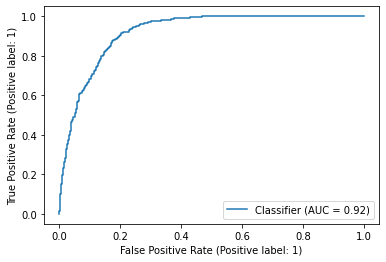

AUC_dtree: 0.6919765906439497


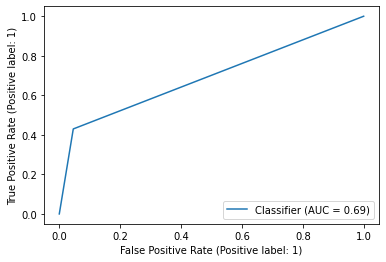

In [205]:
# AUC
print('AUC_log:', roc_auc_score(y_test, logpred))
roc = RocCurveDisplay.from_predictions(y_test, logmodel.predict_proba(X_test)[:,1])
plt.show()

print('AUC_dtree:', roc_auc_score(y_test, dtreepred))
roc = RocCurveDisplay.from_predictions(y_test, dtree.predict_proba(X_test)[:,1])
plt.show()

In [206]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc


def read_file(path):
  df = pd.read_csv(path, sep = ';')
  return df

def encoding(data):
  df = read_file(data)
  df = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'duration']]
  df = pd.get_dummies(df, columns = ['job'])
  df = pd.get_dummies(df, columns = ['education'])
  df = pd.get_dummies(df, columns = ['marital'])
  df = pd.get_dummies(df, columns = ['default'])
  df = pd.get_dummies(df, columns = ['poutcome'])
  df = pd.get_dummies(df, columns = ['campain'])
  return df

def loan_housing(data):
  data['housing'] = data['housing'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
  data['loan'] = data['loan'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
  data["loan"] = data["loan"]+ data["housing"]
  data = data.drop("housing",axis=1)
  data.drop(['loan'], axis=1, inplace = True)
  return data


def drop_outlier(data):
  for feat in data[['duration','age', 'previous']]:
    sns.boxplot(feat)
    Q1 = feat.quantile(.25)
    Q3 = feat.quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[feat >= lower] 
    data = data[feat <=upper] 
  return data

def exchange_y(data):
  data['y'] = data['y'].map({'yes': 1, 'no': 0})
  return data['y']

def drop_Na(data):
  data = data.dropna()
  return data


def train_test_split(data, test_size):
  y = data['y']
  X = data.drop(['y'], axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  return X_train, y_train, X_test, y_test

def cross_val(data):
  k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
  model = [LogisticRegression(),DecisionTreeClassifier(criterion='gini')]
  for model in model:
    model_scores = cross_val_score(model, X_train, y_train, cv=3)
    model_reg_mean = model_scores.mean()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_model = accuracy_score(y_test, pred)
    roc_auc_score = roc_auc_score(y_test, pred)
    roc = RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:,1])
    graph = plt.show()

  return model_reg_mean, accuracy_model, roc_auc_score, graph
  


def predict_proba(model):
  roc = RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:,1])
  graph = plt.show()
  return graph


    
